# AmgX benchmarks -- 3D Poisson Problem

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

## I. Descriptions

---------------------
### PDE:

\begin{equation}
\frac{\partial u^2}{\partial^2 x} + \frac{\partial u^2}{\partial^2 y} + \frac{\partial u^2}{\partial^2 z} = -12\pi^2\cos{(2\pi x)}\cos{(2\pi y)}\cos{(2\pi z)}
\end{equation}

---------------------
### BCs:

\begin{equation}
\left.\frac{\partial u}{\partial x}\right|_{x=0}=
\left.\frac{\partial u}{\partial x}\right|_{x=1}=
\left.\frac{\partial u}{\partial y}\right|_{y=0}=
\left.\frac{\partial u}{\partial y}\right|_{y=1}=
\left.\frac{\partial u}{\partial z}\right|_{z=0}=
\left.\frac{\partial u}{\partial z}\right|_{z=1}=
0
\end{equation}

---------------------
### Exact solution:

\begin{equation}
u(x, y) = \cos{(2\pi x)}\cos{(2\pi y)}\cos{(2\pi z)}
\end{equation}

---------------------
### Mesh:

1. Nx=160, Ny=160, Nz=160
2. Nx=320, Ny=160, Nz=80
3. Nx=1000, Ny=500, Nz=20

---------------------
### Solvers:

1. AmgX solver with 1, 2, 4, 8, 16, 32 GPUs
2. PETSc KSP solver with 16, 32, 64, 128, 256, 512 CPUs

--------------------
### Solver configurations:

##### 1. AmgX

In [2]:
! cat ../configs/AmgX_V_HMIS_LU_0.8.info

config_version=2

communicator=MPI

solver(pcgf)=PCG
determinism_flag=1
pcgf:preconditioner(prec)=AMG
pcgf:use_scalar_norm=1
pcgf:max_iters=20000
pcgf:convergence=ABSOLUTE
pcgf:tolerance=1e-12
pcgf:norm=LMAX
pcgf:print_solve_stats=1
pcgf:monitor_residual=1
pcgf:obtain_timings=0

prec:error_scaling=0
prec:print_grid_stats=1
prec:max_iters=1
prec:cycle=V
prec:min_coarse_rows=2
prec:max_levels=100

prec:smoother(smoother)=BLOCK_JACOBI
prec:presweeps=1
prec:postsweeps=1
prec:coarsest_sweeps=1

prec:coarse_solver(c_solver)=DENSE_LU_SOLVER
prec:dense_lu_num_rows=2

prec:algorithm=CLASSICAL
prec:selector=HMIS
prec:interpolator=D2
prec:strength=AHAT


smoother:relaxation_factor=0.8


##### 2. PETSc KSP

In [3]:
! cat ../configs/PETSc_SolverOptions.info

-ksp_rtol 1e-14
-ksp_atol 1e-8
-pc_type gamg
-pc_gamg_type agg
-pc_gamg_agg_nsmooths 1
-pc_gamg_threshold 0.8


---------------------
#### Machine specification

1. GPU nodes:
 * GPU: two K20m per node
 * Cases using the AmgX solver run on this kind of nodes
2. CPU nodes: 
 * CPU: two Intel Xeon E5-2670 per node (totally 16 cores per node)
 * Cases using the PETSc KSP solver run on this kind of nodes

## II. Results

---------------------------
### Raw data

In [4]:
run grabData.py # pull out results from output files

Found following result files:
	Nx160Ny160Nz160_PETSc01.result
	Nx320Ny160Nz80_GPU04.result
	Nx160Ny160Nz160_GPU08.result
	Nx320Ny160Nz80_PETSc04.result
	Nx160Ny160Nz160_GPU02.result
	Nx160Ny160Nz160_GPU32.result
	Nx320Ny160Nz80_GPU01.result
	Nx320Ny160Nz80_PETSc16.result
	Nx320Ny160Nz80_GPU16.result
	Nx160Ny160Nz160_GPU16.result
	Nx320Ny160Nz80_PETSc08.result
	Nx160Ny160Nz160_PETSc02.result
	Nx160Ny160Nz160_PETSc16.result
	Nx320Ny160Nz80_PETSc02.result
	Nx320Ny160Nz80_PETSc01.result
	Nx160Ny160Nz160_GPU01.result
	Nx160Ny160Nz160_PETSc08.result
	Nx320Ny160Nz80_GPU02.result
	Nx320Ny160Nz80_GPU32.result
	Nx320Ny160Nz80_GPU08.result
	Nx160Ny160Nz160_GPU04.result
	Nx1000Ny500Nz200_PETSc32_old.result
	Nx160Ny160Nz160_PETSc04.result
	Nx1000Ny500Nz200_GPU32.result
Nx1000Ny500Nz200_GPU32 :  1.794997 sec,  5 runs
Nx1000Ny500Nz200_PETSc512 :  15.892116 sec,  1 runs
Nx160Ny160Nz160_GPU01 :  0.810423 sec,  5 runs
Nx160Ny160Nz160_GPU02 :  0.686272 sec,  5 runs
Nx160Ny160Nz160_GPU04 :  0.424372 sec, 

----------------------
### Figures

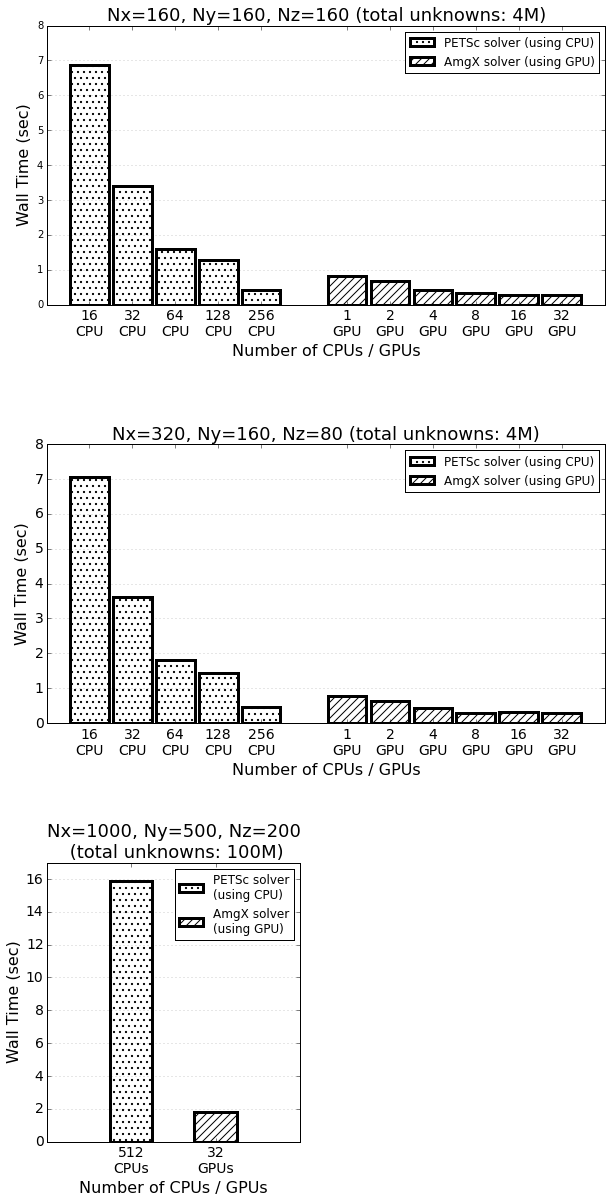

In [5]:
# This block is for plots

GPUs = numpy.array([1, 2, 4, 8, 16, 32])
PETScNodes = numpy.array([1, 2, 4, 8, 16, 32])

timeGPUs_a = numpy.array(
    [wallTime['Nx160Ny160Nz160_GPU01'], 
     wallTime['Nx160Ny160Nz160_GPU02'], 
     wallTime['Nx160Ny160Nz160_GPU04'], 
     wallTime['Nx160Ny160Nz160_GPU08'], 
     wallTime['Nx160Ny160Nz160_GPU16'], 
     wallTime['Nx160Ny160Nz160_GPU32']])
    
timePETSc_a = numpy.array(
    [wallTime['Nx160Ny160Nz160_PETSc016'], 
     wallTime['Nx160Ny160Nz160_PETSc032'], 
     wallTime['Nx160Ny160Nz160_PETSc064'], 
     wallTime['Nx160Ny160Nz160_PETSc128'], 
     wallTime['Nx160Ny160Nz160_PETSc256']])

timeGPUs_b = numpy.array(
    [wallTime['Nx320Ny160Nz80_GPU01'], 
     wallTime['Nx320Ny160Nz80_GPU02'], 
     wallTime['Nx320Ny160Nz80_GPU04'], 
     wallTime['Nx320Ny160Nz80_GPU08'], 
     wallTime['Nx320Ny160Nz80_GPU16'], 
     wallTime['Nx320Ny160Nz80_GPU32']])
    
timePETSc_b = numpy.array(
    [wallTime['Nx320Ny160Nz80_PETSc016'], 
     wallTime['Nx320Ny160Nz80_PETSc032'], 
     wallTime['Nx320Ny160Nz80_PETSc064'], 
     wallTime['Nx320Ny160Nz80_PETSc128'], 
     wallTime['Nx320Ny160Nz80_PETSc256']])

timeGPUs_c = numpy.array([wallTime['Nx1000Ny500Nz200_GPU32']])
    
timePETSc_c = numpy.array([wallTime['Nx1000Ny500Nz200_PETSc512']])

#==============================================
# Plots
#==============================================
fig = pyplot.figure(figsize=(10, 20))
ax1 = pyplot.subplot2grid((3, 2), (0,0), colspan=2)
ax2 = pyplot.subplot2grid((3, 2), (1,0), colspan=2)
ax3 = pyplot.subplot2grid((3, 2), (2, 0), colspan=1)

#==============================================
# Fig 1: Nx=160, Ny=160, Nz=160 (total N=4M)
#==============================================

locs = numpy.arange(14)
ax1.set_xlim(0, 13)
ax1.set_xticks([1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12])
ax1.set_xticklabels(['16\nCPU', '32\nCPU', '64\nCPU', '128\nCPU', '256\nCPU',
                      '1\nGPU', '2\nGPU', '4\nGPU', '8\nGPU', '16\nGPU', '32\nGPU'],
                    fontsize=14)
ax1.set_xlabel("Number of CPUs / GPUs", fontsize=16)
ax1.set_ylim(0, 8)
ax1.set_ylabel("Wall Time (sec)", fontsize=16)
ax1.yaxis.grid(True, alpha=0.4)

ax1.bar(locs[1:6]-0.45, timePETSc_a, 0.9, fill=True,
        color='w', edgecolor='k', hatch='..', linewidth=3, alpha=1,
        label='PETSc solver (using CPU)')
ax1.bar(locs[7:13]-0.45, timeGPUs_a, 0.9, fill=True,
        color='w', edgecolor='k', hatch='///', linewidth=3, alpha=1,
        label='AmgX solver (using GPU)')

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels)

ax1.set_title("Nx=160, Ny=160, Nz=160 (total unknowns: 4M)", y=1.0, fontsize=18)

#==============================================
# Fig 2: Nx=320, Ny=160, Nz=80 (total N=4M)
#==============================================

locs = numpy.arange(14)
ax2.set_xlim(0, 13)
ax2.set_xticks([1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12])
ax2.set_xticklabels(['16\nCPU', '32\nCPU', '64\nCPU', '128\nCPU', '256\nCPU',
                      '1\nGPU', '2\nGPU', '4\nGPU', '8\nGPU', '16\nGPU', '32\nGPU'],
                    fontsize=14)
ax2.set_xlabel("Number of CPUs / GPUs", fontsize=16)
ax2.set_ylim(0, 8)
ax2.set_ylabel("Wall Time (sec)", fontsize=16)
ax2.tick_params(axis='y', labelsize=14)
ax2.yaxis.grid(True, alpha=0.4)

ax2.bar(locs[1:6]-0.45, timePETSc_b, 0.9, fill=True,
        color='w', edgecolor='k', hatch='..', linewidth=3, alpha=1,
        label='PETSc solver (using CPU)')
ax2.bar(locs[7:13]-0.45, timeGPUs_b, 0.9, fill=True,
        color='w', edgecolor='k', hatch='///', linewidth=3, alpha=1,
        label='AmgX solver (using GPU)')

handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels)

ax2.set_title("Nx=320, Ny=160, Nz=80 (total unknowns: 4M)", y=1.0, fontsize=18)

#==============================================
# Fig 3: Nx=1000, Ny=500, Nz=200 (total N=100M)
#==============================================

ax3.set_xlim(0, 3)
ax3.set_xticks([1, 2])
ax3.set_xticklabels(['512\nCPUs', '32\nGPUs'], fontsize=14)
ax3.set_xlabel("Number of CPUs / GPUs", fontsize=16)
ax3.set_ylim(0, 17)
ax3.set_ylabel("Wall Time (sec)", fontsize=16)
ax3.tick_params(axis='y', labelsize=14)
ax3.yaxis.grid(True, alpha=0.4)

ax3.bar(0.75, timePETSc_c, 0.5, fill=True,
        color='w', edgecolor='k', hatch='..', linewidth=3, alpha=1,
        label='PETSc solver\n(using CPU)')
ax3.bar(1.75, timeGPUs_c, 0.5, fill=True,
        color='w', edgecolor='k', hatch='///', linewidth=3, alpha=1,
        label='AmgX solver\n(using GPU)')

handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles, labels, loc=0, fontsize=12)

ax3.set_title("Nx=1000, Ny=500, Nz=200\n (total unknowns: 100M)", y=1.0, fontsize=18)
pyplot.subplots_adjust(hspace=0.5)